### For Feature Importance
https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

from plotly.subplots import make_subplots
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
red_df = pd.read_csv("data-wine/winequality-red-uci.csv",sep=";")
white_df = pd.read_csv("data-wine/winequality-white-uci.csv",sep=";")

In [15]:
red_df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

## Variable identification and its significance

In [17]:
red_df.info()

## So everything is integer 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
red_df.describe().T

## Unit of all this value is g/dm^3

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [40]:
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Histogram(x=red_df[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()

In [41]:
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Violin(y=red_df[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()

In [42]:
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Box(y=red_df[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()

In [53]:
for col in column:
    print(f"{col}  :- {df[col].isnull().sum()}")
    
## No missing value 

fixed acidity  :- 0
volatile acidity  :- 0
citric acid  :- 0
residual sugar  :- 0
chlorides  :- 0
free sulfur dioxide  :- 0
total sulfur dioxide  :- 0
density  :- 0
pH  :- 0
sulphates  :- 0
alcohol  :- 0
quality  :- 0


## Conclusion 

## Well from univariate analysis all i can say is 
* Firstly all the data are distributed differently and also the scale is different . So we need to do some sort of scaling and normalization . **Now This will depend on model whether we need to do it or not**

* There are few columns which show extreme outliers that need to be taken care of. **To drop or keep is what we need to take decision**

## BIVARIATE ANALYSIS

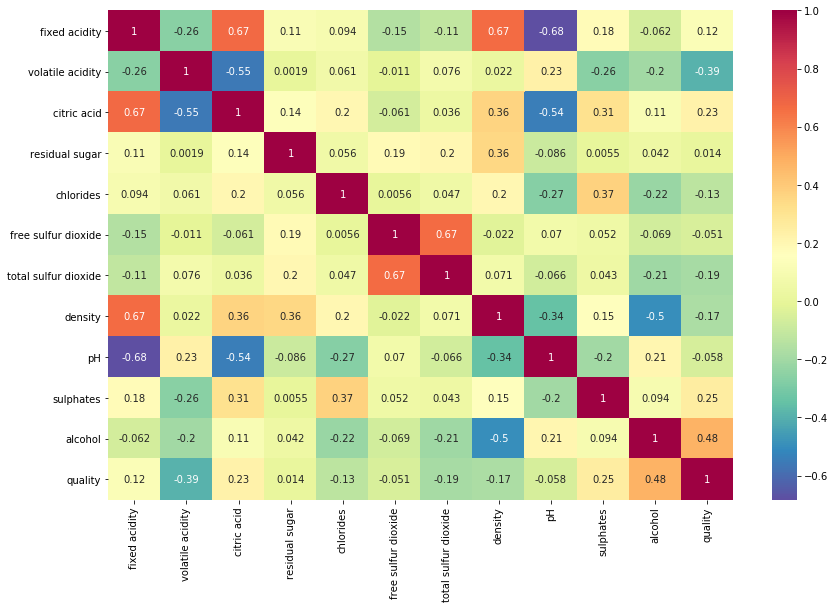

In [75]:
corr = red_df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr,annot=True,cmap="Spectral_r");

## Relation between variables 
* fixed acidity vs citric acid ,density,ph
* volatile acid vs citric acid
* free sulfur dioxide and total sufur dioxide
* density alcohol


In [76]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [80]:
pairplot = ["fixed acidity","volatile acidity","citric acid","pH","density","alcohol","free sulfur dioxide","total sulfur dioxide"]
pair = red_df[pairplot[:4]]

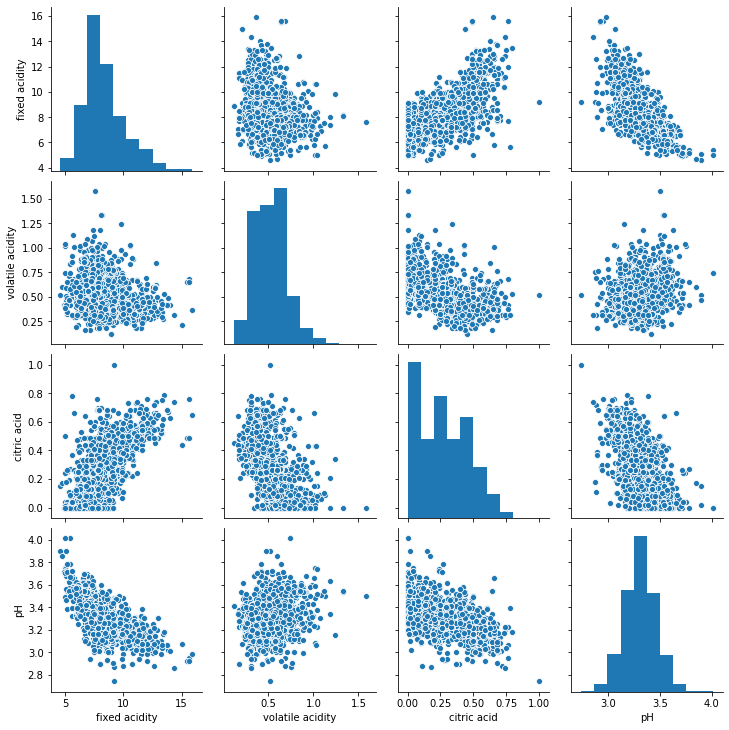

In [81]:
sns.pairplot(pair);

## These acidity are related to each other in one way or another 
## you can later think of dropping one of these column and combining them into one or more column

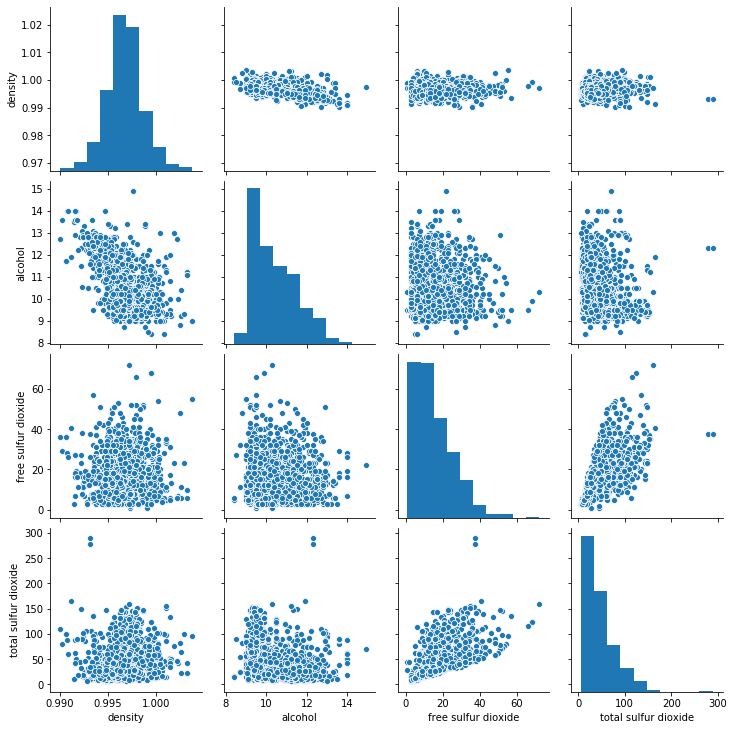

In [83]:
pair = red_df[pairplot[4:]]
sns.pairplot(pair);

## free sulfur and total sulfur can definitely be combined to one

In [84]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [92]:
fig = px.scatter(red_df,y="citric acid",x="fixed acidity",color="quality")
fig.show()

fig = px.scatter(red_df,x="fixed acidity",y="density",color="quality")
fig.show()

## Both density and fixed acidity are positively related but lower part of graph as more good quality wines

fig = px.scatter(red_df,x="fixed acidity",y="pH",color="quality")
fig.show()

fig = px.scatter(red_df,x="density",y="alcohol",color="quality")
fig.show()

## Alcohol and density are negatively realted but wine with more %age of alchol has good rating

fig = px.scatter(red_df,x="volatile acidity",y="citric acid",color="quality")
fig.show()

## Wine with low volatile acidity has good rating

fig = px.scatter(red_df,x="free sulfur dioxide",y="total sulfur dioxide",color="quality")
fig.show()

## Wine with less total suplhur dioxide has more good rating

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [121]:
X,y = red_df.loc[:,red_df.columns!="quality"],red_df.loc[:,red_df.columns=="quality"]

In [122]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
1594        5
1595        6
1596        6
1597        5
1598        6

[1599 rows x 1 columns]

In [123]:
def map_values(val):
    if val<=4.5:
        return "Poor"
    elif 4.5<val<=6.5:
        return "Avg"
    else:
        return "Good"
    
y = y["quality"].apply(map_values)

In [133]:
y = pd.DataFrame({"quality":y})
y

quality
0        Avg
1        Avg
2        Avg
3        Avg
4        Avg
...      ...
1594     Avg
1595     Avg
1596     Avg
1597     Avg
1598     Avg

[1599 rows x 1 columns]

In [135]:
def evaluate(clf,X,y,k):
    scores = cross_val_score(clf,X,y,cv=k)
    mean = np.sum(scores)/k
    return scores,mean

accuracy = []

svc = SVC()
print("-------------SVC----------------")
scores,acc = evaluate(svc,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")


knn = KNeighborsClassifier()
print("-------------KNN----------------")
scores,acc = evaluate(knn,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")



gnb = GaussianNB()
print("-------------GNB----------------")
scores,acc = evaluate(gnb,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")



log_reg = LogisticRegression()
print("-------------LOR----------------")
scores,acc = evaluate(log_reg,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")



rf = RandomForestClassifier()
print("-------------RFC----------------")
scores,acc = evaluate(rf,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")



dtree = DecisionTreeClassifier()
print("-------------DTC----------------")
scores,acc = evaluate(dtree,X,y,10)
print("Scores :- ",scores)
print("MeanScore :- ",acc)
accuracy.append(acc)
print("\n\n")


## Everyone is performing better basically we should just check feature importance

-------------SVC----------------
Scores :-  [0.825      0.825      0.825      0.825      0.825      0.825
 0.825      0.825      0.825      0.82389937]
MeanScore :-  0.8248899371069183



-------------KNN----------------
Scores :-  [0.825      0.81875    0.8125     0.7375     0.84375    0.80625
 0.75625    0.8        0.85       0.82389937]
MeanScore :-  0.8073899371069182



-------------GNB----------------
Scores :-  [0.78125    0.80625    0.74375    0.7125     0.8625     0.8375
 0.625      0.7125     0.8125     0.82389937]
MeanScore :-  0.7717649371069183



-------------LOR----------------
Scores :-  [0.825      0.85       0.8125     0.85       0.85       0.85
 0.79375    0.825      0.825      0.82389937]
MeanScore :-  0.8305149371069183



-------------RFC----------------
Scores :-  [0.81875   0.85625   0.8       0.8       0.8625    0.81875   0.8
 0.85625   0.825     0.8490566]
MeanScore :-  0.8286556603773585



-------------DTC----------------
Scores :-  [0.8125     0.80625    0.

In [152]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{col[i]}--------------->{round(v,4)}')


fixed acidity--------------->0.0531
volatile acidity--------------->0.3878
citric acid--------------->-0.3775
residual sugar--------------->-0.0306
chlorides--------------->0.1235
free sulfur dioxide--------------->0.0083
total sulfur dioxide--------------->0.007
density--------------->0.4525
pH--------------->1.3745
sulphates--------------->-0.4844
alcohol--------------->-0.3983


In [145]:
col = X.columns
col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

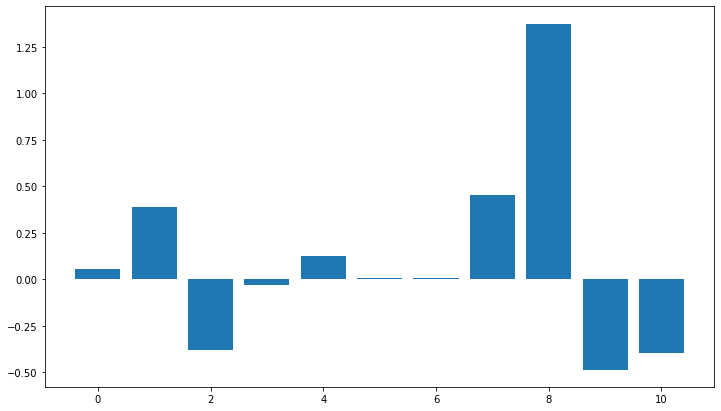

In [153]:
plt.figure(figsize=(12,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## i.e ph,sulphates,alcohol**,density,citric acid,volatile acidity

fixed acidity--------------->0.0805
volatile acidity--------------->0.1098
citric acid--------------->0.0886
residual sugar--------------->0.0758
chlorides--------------->0.0788
free sulfur dioxide--------------->0.0598
total sulfur dioxide--------------->0.087
density--------------->0.0957
pH--------------->0.0671
sulphates--------------->0.1093
alcohol--------------->0.1475







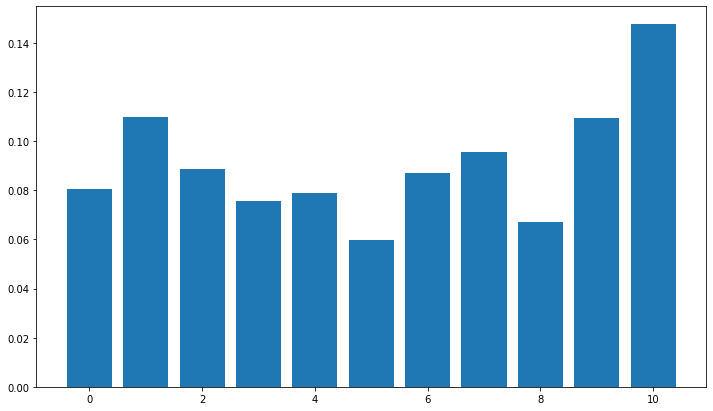

In [151]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{col[i]}--------------->{round(v,4)}')
    
print("\n\n\n\n")
# plot feature importance
plt.figure(figsize=(12,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Well this is taking mostly all the features 

In [162]:
svc = SVC(kernel='linear')
svc.fit(X,y)
print(svc.coef_)

## I don't know why three arrays come 

[[-3.19138344e-04  8.03819126e-03  2.40325989e-03 -2.11503160e-04
   2.41045396e-02  7.38253675e-07  5.41658837e-05  1.40818716e-02
   9.53509609e-04 -9.26045816e-03 -2.34454867e-03]
 [ 3.13722865e-05 -7.94822908e-04  9.56705634e-06 -4.16865495e-05
  -2.16580831e-03 -3.53519924e-05  4.68550279e-05  8.51683404e-03
   8.62290634e-05  4.05947458e-04  3.67021958e-05]
 [ 1.06376023e-01 -2.80828192e+00 -3.56872072e-01 -1.73807636e-02
  -3.34098332e-01  2.75507924e-02 -7.12299651e-03  4.39892666e-03
  -6.25497657e-01  1.47338043e+00  7.93623927e-01]]


In [158]:
column_train = col.to_list()
column_train

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Let's try first scaling and normalizing and all that stuff 
## Then try to add some features and all 
## combine both and see 

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from scipy import stats
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
def map_values(val):
    if val<=4.5:
        return "Poor"
    elif 4.5<val<=6.5:
        return "Avg"
    else:
        return "Good"
    
red_df["quality"]= red_df["quality"].apply(map_values)
red_df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
1594     10.5     Avg  
1595     11.2     Avg  
1596     11.0     Avg  
1597     10.2     Avg  
1598     11.0     Avg

In [51]:
X,y = red_df.loc[:,red_df.columns!="quality"],red_df.loc[:,red_df.columns=="quality"]
y.head()

quality
0     Avg
1     Avg
2     Avg
3     Avg
4     Avg

In [52]:
column = X.columns
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [53]:
X.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0

## Using MinMax Scaler

In [54]:
minmax = MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X),columns=column)
X.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594       0.141593          0.328767         0.08        0.075342   0.130217   
1595       0.115044          0.294521         0.10        0.089041   0.083472   
1596       0.150442          0.267123         0.13        0.095890   0.106845   
1597       0.115044          0.359589         0.12        0.075342   0.105175   
1598       0.123894          0.130137         0.47        0.184932   0.091820   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1594             0.436620              0.134276  0.354626  0.559055   
1595             0.535211              0.159011  0.370778  0.614173   
1596             0.394366              0.120141  0.416300  0.535433   
1597             0.436620              0.134276  0.396476  0.653543   
1598             0.239437              0.127208  0.397944  0.511811   

      sulphates   alcohol  
1594   0.149701  0.323077  
1595   0.257485  0.430769  
1596   0.251497  0.400000  
1597   0.227545  0.276923  
1598   0.197605  0.400000

In [55]:
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Histogram(x=X[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()

## All the plots have same shape only scale has changed i.e from 0 to 1

In [79]:
def evaluate(clf,X,y,k):
    scores = cross_val_score(clf,X,y,cv=k)
    mean = np.sum(scores)/k
    return scores,mean

def test_models(X,y):
    accuracy = []

    svc = SVC()
    print("-------------SVC----------------")
    scores,acc = evaluate(svc,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")


    knn = KNeighborsClassifier()
    print("-------------KNN----------------")
    scores,acc = evaluate(knn,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")



    gnb = GaussianNB()
    print("-------------GNB----------------")
    scores,acc = evaluate(gnb,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")



    log_reg = LogisticRegression()
    print("-------------LOR----------------")
    scores,acc = evaluate(log_reg,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")



    rf = RandomForestClassifier()
    print("-------------RFC----------------")
    scores,acc = evaluate(rf,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")



    dtree = DecisionTreeClassifier()
    print("-------------DTC----------------")
    scores,acc = evaluate(dtree,X,y,10)
    print("Scores :- ",scores)
    print("MeanScore :- ",acc)
    accuracy.append(acc)
    print("\n")
    
    return accuracy


## Everyone is performing better basically we should just check feature importance

In [28]:
## Evaluating using MiinMax Scaler 
acc = test_models(X,y)

# SVC :-  0.8248899371069183
# KNN :-  0.8073899371069182
# GNB :-  0.7717649371069183
# LOR :-  0.8305149371069183
# RFC :-  0.8286556603773585
# DTC :-  0.7529677672955974


## As expected gradient descent as well as distance related model improved slightly i.e LOR,SVC,KNN
## And tree based models were mostly unaffected 

-------------SVC----------------
Scores :-  [0.83125    0.8375     0.8375     0.83125    0.84375    0.85
 0.81875    0.85       0.825      0.83647799]
MeanScore :-  0.8361477987421384



-------------KNN----------------
Scores :-  [0.80625    0.84375    0.7875     0.81875    0.88125    0.825
 0.78125    0.8        0.80625    0.79874214]
MeanScore :-  0.814874213836478



-------------GNB----------------
Scores :-  [0.76875    0.83125    0.75       0.7125     0.85625    0.8375
 0.625      0.7        0.8125     0.82389937]
MeanScore :-  0.7717649371069182



-------------LOR----------------
Scores :-  [0.825      0.8375     0.825      0.83125    0.85       0.85625
 0.79375    0.83125    0.85       0.83647799]
MeanScore :-  0.8336477987421385



-------------RFC----------------
Scores :-  [0.825      0.85625    0.8375     0.7875     0.85       0.83125
 0.8        0.85       0.83125    0.85534591]
MeanScore :-  0.8324095911949685



-------------DTC----------------
Scores :-  [0.7875     0

In [34]:
def feature_importance_lor(X,y):
    ## Feature importance of LOR
    # define the model
    model = LogisticRegression()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.coef_[0]
    # summarize feature importance
    for i,v in enumerate(importance):
        print(f'{column[i]}--------------->{round(v,4)}')

    plt.figure(figsize=(12,7))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

fixed acidity--------------->-0.8434
volatile acidity--------------->-0.5247
citric acid--------------->-0.3111
residual sugar--------------->-1.2064
chlorides--------------->0.5655
free sulfur dioxide--------------->0.4935
total sulfur dioxide--------------->1.644
density--------------->1.0761
pH--------------->-0.6213
sulphates--------------->-1.4186
alcohol--------------->-1.5333


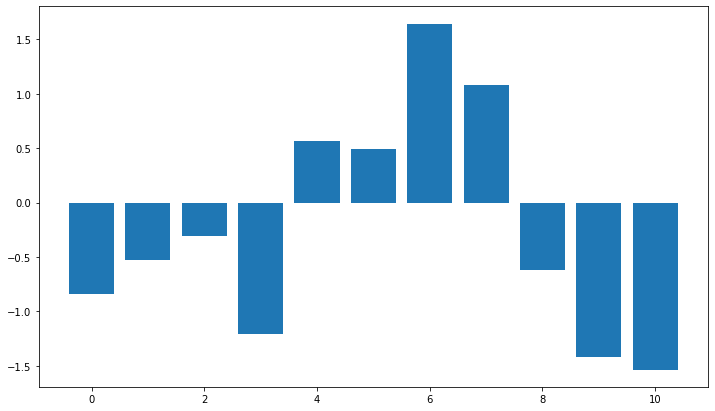

In [37]:
## Feature importance of LOR

feature_importance_lor(X,y)

## i.e ph,sulphates,alcohol**,density These are the common traits which the previous algorithm without scaling
## was also able to find out but here this model recognize more imp factors 

## Like TotalSulfurOxide and residual sugar and fixed acidity also these have more than one column depicting
## same issue it is more able to capture the important feature

fixed acidity--------------->0.0768
volatile acidity--------------->0.1187
citric acid--------------->0.0841
residual sugar--------------->0.0774
chlorides--------------->0.0772
free sulfur dioxide--------------->0.0613
total sulfur dioxide--------------->0.0851
density--------------->0.0958
pH--------------->0.0714
sulphates--------------->0.1096
alcohol--------------->0.1426







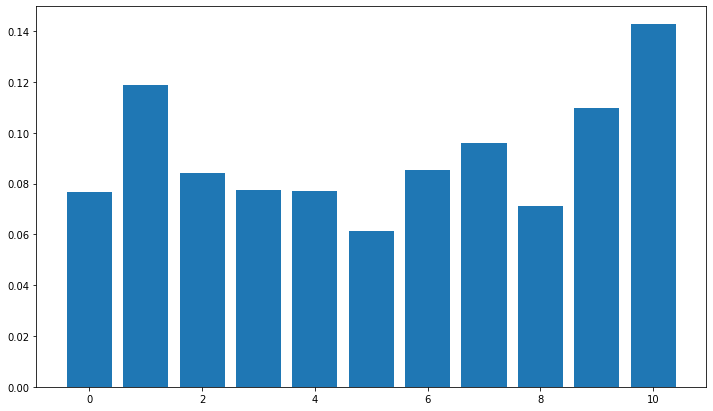

In [39]:
## Feature importance Random Forest
def feature_importance_rf(X,y):
    model = RandomForestClassifier()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print(f'{column[i]}--------------->{round(v,4)}')

    print("\n\n\n\n")
    # plot feature importance
    plt.figure(figsize=(12,7))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
feature_importance_rf(X,y)

## Well here mostly nothing changed

## Trying Robust Scaler

In [61]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [71]:
column = X.columns
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [73]:
## Fetching Data
X,y = red_df.loc[:,red_df.columns!="quality"],red_df.loc[:,red_df.columns=="quality"]

## Every data got scaled good except those who were originally less by scaling their values got increased.Hence
column_rbst = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide','pH', 'alcohol']



## Applying robust Scaler
rbstscler = RobustScaler()

for col in column_rbst:
    X[col] = rbstscler.fit_transform(X[col].values.reshape(-1, 1))

## Plotting the new distribution
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Histogram(x=X[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()


## Residual Sugar got scaled very differently

In [78]:
np.max(red_df["residual sugar"]),np.max(X["residual sugar"]) ## This is what is very wierd 

(15.5, 18.999999999999996)

In [80]:
## Testing on models Robust Scaler via  testmodels function defined above

acc = test_models(X,y)


# SVC :-  0.8361477987421384
# KNN :-  0.814874213836478
# GNB :-  0.7717649371069182
# LOR :-  0.8336477987421385
# RFC :-  0.8324095911949685
# DTC :-  0.7448506289308175

## Slight improvement in logistic and Random Forest

-------------SVC----------------
Scores :-  [0.825      0.83125    0.825      0.78125    0.825      0.83125
 0.81875    0.825      0.81875    0.82389937]
MeanScore :-  0.8205149371069183


-------------KNN----------------
Scores :-  [0.81875    0.8375     0.81875    0.775      0.85625    0.825
 0.74375    0.80625    0.84375    0.82389937]
MeanScore :-  0.8148899371069183


-------------GNB----------------
Scores :-  [0.76875    0.83125    0.75       0.7125     0.85625    0.8375
 0.625      0.7        0.81875    0.82389937]
MeanScore :-  0.7723899371069182


-------------LOR----------------
Scores :-  [0.8125     0.84375    0.8125     0.825      0.86875    0.8625
 0.80625    0.8375     0.8375     0.83647799]
MeanScore :-  0.8342727987421383


-------------RFC----------------
Scores :-  [0.8375     0.84375    0.84375    0.78125    0.85625    0.8375
 0.80625    0.85       0.84375    0.85534591]
MeanScore :-  0.8355345911949685


-------------DTC----------------
Scores :-  [0.8125     0.8 

## DOUBT 

> Well I think this logistic model captured unnecessary feature and also check whether this feature importance and all needs to be calculated on validation set or training set will do ?

fixed acidity--------------->-0.0828
volatile acidity--------------->-0.2688
citric acid--------------->-0.2381
residual sugar--------------->-0.0702
chlorides--------------->0.6634
free sulfur dioxide--------------->0.0487
total sulfur dioxide--------------->0.403
density--------------->0.0417
pH--------------->-0.1391
sulphates--------------->-0.8443
alcohol--------------->-0.4111


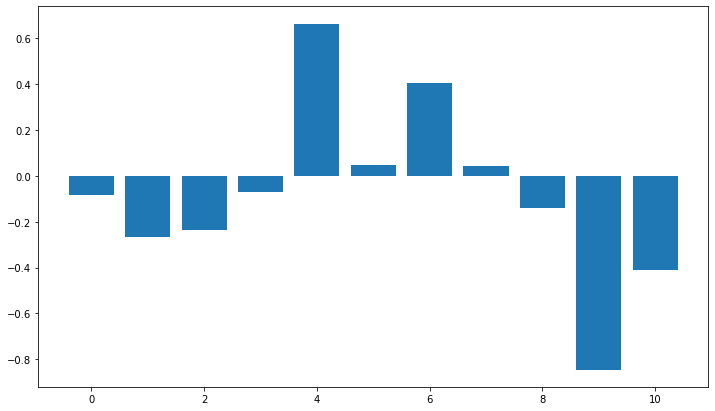

fixed acidity--------------->0.0807
volatile acidity--------------->0.1168
citric acid--------------->0.0842
residual sugar--------------->0.0795
chlorides--------------->0.0778
free sulfur dioxide--------------->0.0609
total sulfur dioxide--------------->0.0817
density--------------->0.0891
pH--------------->0.0703
sulphates--------------->0.1102
alcohol--------------->0.1488







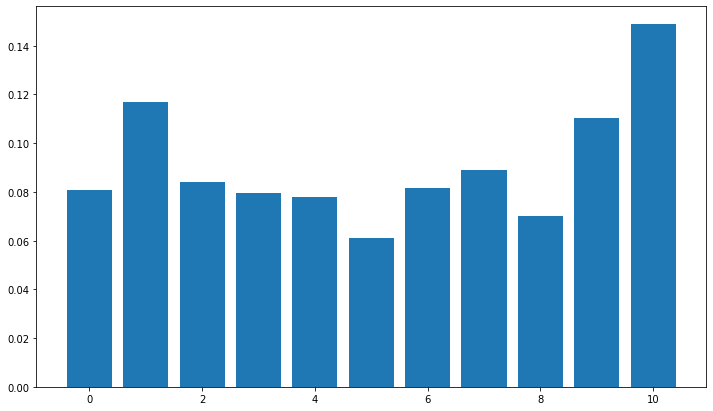

In [81]:
feature_importance_lor(X,y)
feature_importance_rf(X,y)


## Trying Standard Scaler 

In [87]:
## Fetching Data
X,y = red_df.loc[:,red_df.columns!="quality"],red_df.loc[:,red_df.columns=="quality"]

## Applying StandarScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column)

## Plotting the new distribution
fig = make_subplots(rows=6,cols=2)
i=0
for j,col in enumerate(column):
    if j%2==0:
        i+=1
    
    j = (j%2)+1
    fig.add_trace(go.Histogram(x=X[col],name=col),row=i, col=j)
    
fig.update_layout(height=1400, width=1000, title_text="Univariate analysis")
fig.show()


In [88]:
acc

[0.8205149371069183,
 0.8148899371069183,
 0.7723899371069182,
 0.8342727987421383,
 0.8355345911949685,
 0.7423309748427673]

In [90]:
## Testing models on standard scaler
test_models(X,y)

## Again LOR increased slighlty 83.43   --- >  83.49
## Well RF decreased though

## And surprising svm gave the highest value  i.e 83.8

-------------SVC----------------
Scores :-  [0.81875   0.84375   0.825     0.81875   0.8625    0.875     0.8125
 0.85      0.83125   0.8427673]
MeanScore :-  0.8380267295597484


-------------KNN----------------
Scores :-  [0.7875     0.8375     0.825      0.775      0.86875    0.85625
 0.7875     0.76875    0.8        0.79874214]
MeanScore :-  0.8104992138364778


-------------GNB----------------
Scores :-  [0.76875    0.83125    0.75       0.7125     0.85625    0.8375
 0.625      0.7        0.8125     0.82389937]
MeanScore :-  0.7717649371069182


-------------LOR----------------
Scores :-  [0.8       0.825     0.83125   0.825     0.875     0.86875   0.78125
 0.85      0.85      0.8427673]
MeanScore :-  0.8349017295597484


-------------RFC----------------
Scores :-  [0.8125    0.8625    0.8125    0.8       0.8625    0.8       0.80625
 0.85625   0.83125   0.8490566]
MeanScore :-  0.8292806603773585


-------------DTC----------------
Scores :-  [0.79375    0.81875    0.74375    0.7812

[0.8380267295597484,
 0.8104992138364778,
 0.7717649371069182,
 0.8349017295597484,
 0.8292806603773585,
 0.7467138364779874]

fixed acidity--------------->-0.4148
volatile acidity--------------->-0.119
citric acid--------------->-0.1095
residual sugar--------------->-0.2713
chlorides--------------->0.0488
free sulfur dioxide--------------->0.0367
total sulfur dioxide--------------->0.3449
density--------------->0.4065
pH--------------->-0.2825
sulphates--------------->-0.1626
alcohol--------------->-0.0594


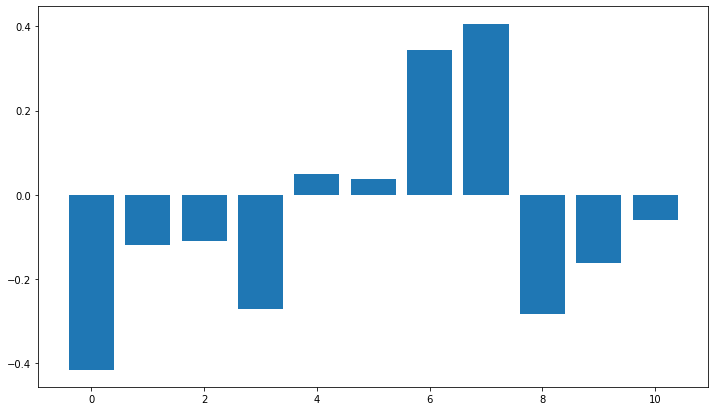

fixed acidity--------------->0.0784
volatile acidity--------------->0.1183
citric acid--------------->0.0852
residual sugar--------------->0.0778
chlorides--------------->0.077
free sulfur dioxide--------------->0.0633
total sulfur dioxide--------------->0.0876
density--------------->0.0898
pH--------------->0.0687
sulphates--------------->0.1044
alcohol--------------->0.1494







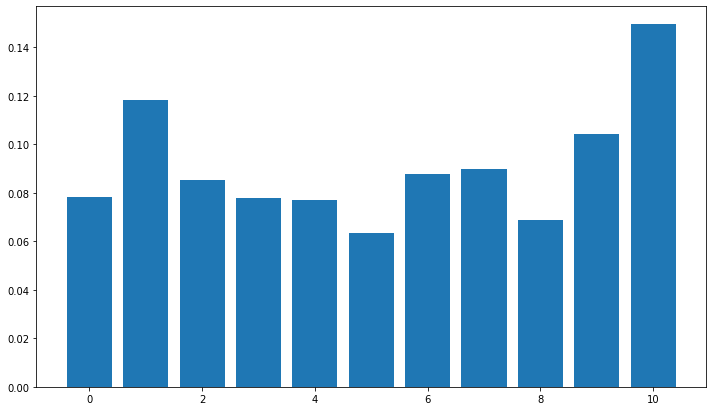

In [91]:
## Checking Feature importance 
feature_importance_lor(X,y)
feature_importance_rf(X,y)

## Well this model capture different features which is quite interesting and different then all above models

## Remaining things 
* How to do hyperparameter tuning of LOR,RFC,SVC . Then which type of data suits them , feature number , training size 
* How to create new features based on existing ones (Feature Selection and Feature Importance)
* **Evaluation Metrics** ROC,AUC and all 